In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('titanic_train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#find the missing values
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

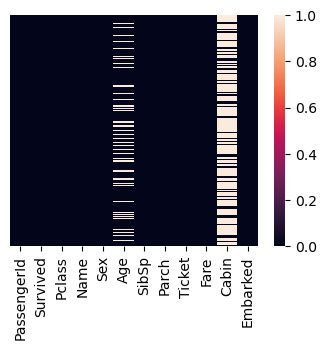

In [23]:
##we gonna use the heatmap to analysis the null values
plt.figure(figsize=(4,3))
sns.heatmap(train.isnull(),  yticklabels=False)
#it shows the white line if there is null values available

<Axes: xlabel='Survived', ylabel='count'>

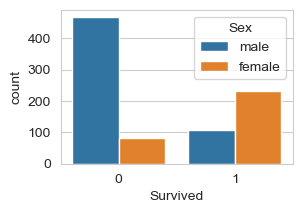

In [38]:
plt.figure(figsize=(3,2))
sns.set_style("whitegrid")# use to make the grid
sns.countplot(x='Survived',hue = 'Sex',data=train)

<Axes: xlabel='Survived', ylabel='count'>

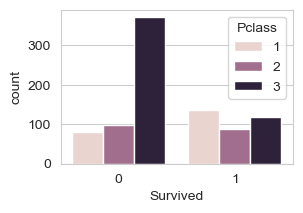

In [39]:
plt.figure(figsize=(3,2))
sns.set_style("whitegrid")
sns.countplot(x='Survived',hue = 'Pclass',data=train)

<Axes: xlabel='Age', ylabel='Count'>

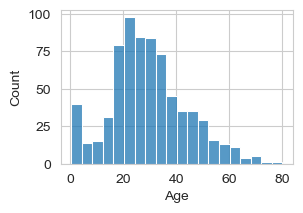

In [51]:
plt.figure(figsize=(3,2))
sns.set_style("whitegrid")
sns.histplot(train['Age'])

<Axes: xlabel='Pclass', ylabel='Age'>

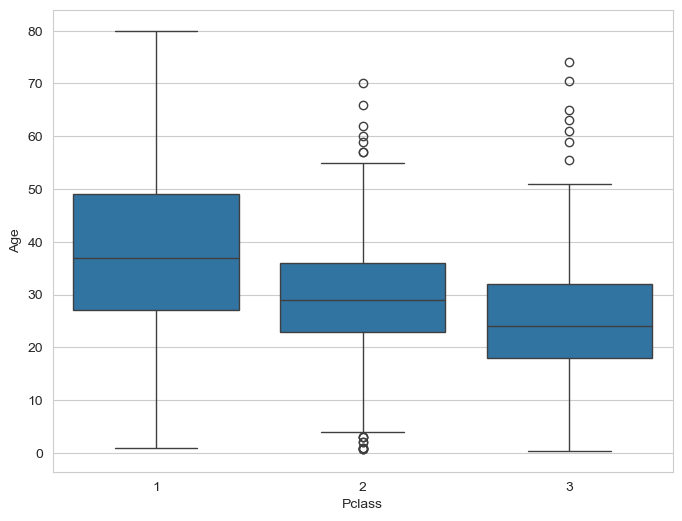

In [69]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Pclass',y='Age',data=train)

In [77]:
#train[['Age','Pclass','Sex']]
def impute_age(cols):
    Age = cols['Age']#get the values of the row wiese values
    Pclass = cols['Pclass']

    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 27
        else:
            return 24
    else:
        return Age

# start this fun for compute all the age values
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

<Axes: >

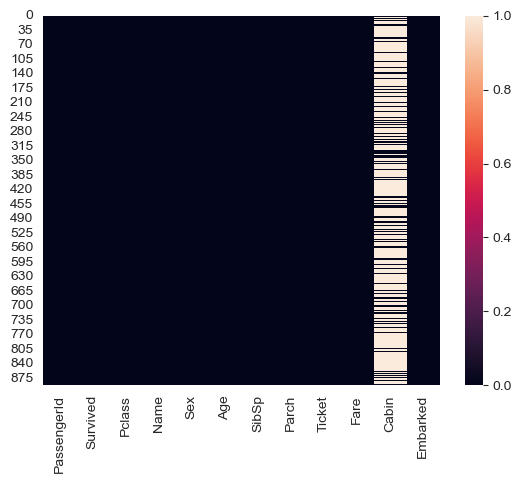

In [76]:
sns.heatmap(train.isnull())
# now the age values is fixed here

In [84]:
#train.drop('Cabin',axis=1,inplace=True)

<Axes: >

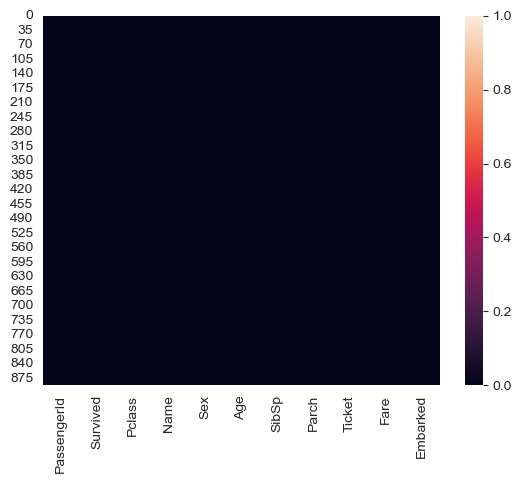

In [87]:
sns.heatmap(train.isnull())

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
Sex_dumm = pd.get_dummies(train['Sex']).astype(int)

Embark_dumm = pd.get_dummies(train['Embarked']).astype(int)



KeyError: 'Sex'

In [31]:
train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [45]:
#Embark_dumm = Embark_dumm.drop('C', axis = 1)
#Embark_dumm
#sex_dumm = sex_dumm.drop('female', axis = 1)
sex_dumm

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [51]:
train = pd.concat([train,Embark_dumm,sex_dumm], axis=1)

In [53]:
train.head()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Q,S,male
0,1,0,3,22.0,1,0,7.2500,0,1,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,1,0
3,4,1,1,35.0,1,0,53.1000,0,1,0
4,5,0,3,35.0,0,0,8.0500,0,1,1


In [56]:
input=train.drop('Survived',axis=1)
input 

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Q,S,male
0,1,3,22.0,1,0,7.2500,0,1,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,1,0
3,4,1,35.0,1,0,53.1000,0,1,0
4,5,3,35.0,0,0,8.0500,0,1,1
...,...,...,...,...,...,...,...,...,...
886,887,2,27.0,0,0,13.0000,0,1,1
887,888,1,19.0,0,0,30.0000,0,1,0
888,889,3,NaN,1,2,23.4500,0,1,0
889,890,1,26.0,0,0,30.0000,0,0,1


In [58]:
label = train['Survived']
label

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64